C:\Users\Tim\Documents\- Dokumente\Code\Qudits Hackathon 2021\qiskit_qudits\circuit\quditcircuit.py:913: UserWarning: Qudit circuit drawer not implemented yet
  warnings.warn("Qudit circuit drawer not implemented yet")
C:\Users\Tim\miniconda3\envs\qiskit\lib\site-packages\qiskit\visualization\text.py:584: RuntimeWarning: The parameter "cregbundle" was disable, since an instruction needs to refer to individual classical wires
  return "\n".join(self.lines()).encode(self.encoding).decode(self.encoding)


        ┌──────┐┌─────┐┌─────┐┌─────────┐┌──────────┐┌──────────┐
  qd_0: ┤0     ├┤0    ├┤0    ├┤0        ├┤0         ├┤0         ├
        │      ││     ││     ││         ││          ││          │
  qd_1: ┤1 QFT ├┤1 ZD ├┤1 ZD ├┤1 QFT_DG ├┤1 BARRIER ├┤1         ├
        │      ││     ││     ││         ││          ││          │
  qd_2: ┤2     ├┤2    ├┤2    ├┤2        ├┤2         ├┤2         ├
        └──░───┘└─┬─┬─┘└─────┘└─────────┘└──────────┘│          │
   q_0: ───░──────┤M├────────────────────────────────┤  MEASURE ├
           ░      └╥┘                                │          │
meas_0: ═══════════╬═════════════════════════════════╡0         ╞
                   ║                                 │          │
meas_1: ═══════════╬═════════════════════════════════╡1         ╞
                   ║                                 │          │
meas_2: ═══════════╬═════════════════════════════════╡2         ╞
                   ║                                 └──────────┘
meas_3: ══

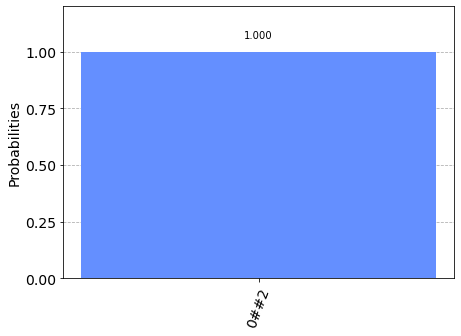

In [1]:
from qiskit import *
from qiskit_qudits import QuditCircuit, QuditRegister
qdc = QuditCircuit([8], 1, 0)
qdc.xd(0, 2)
qdc.measure_all()
print(qdc)


from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
from qiskit_qudits.visualization import counts_to_quditcounts

simulator = Aer.get_backend('qasm_simulator') #simulation part
job = execute(qdc, simulator, shots=99)
counts = job.result().get_counts()
qd_counts = counts_to_quditcounts(qdc, counts)
plot_histogram(qd_counts)

        ┌──────────┐┌──────────┐┌──────────┐   
  qd_0: ┤0         ├┤0         ├┤0         ├───
        │          ││          ││          │   
  qd_1: ┤1         ├┤1 BARRIER ├┤1         ├───
        │  LS(0,6) ││          ││          │   
  qd_2: ┤2         ├┤2         ├┤2         ├───
        │          │└────░─────┘│          │┌─┐
   q_0: ┤3         ├─────░──────┤  MEASURE ├┤M├
        └──────────┘     ░      │          │└╥┘
meas_0: ════════════════════════╡0         ╞═╬═
                                │          │ ║ 
meas_1: ════════════════════════╡1         ╞═╬═
                                │          │ ║ 
meas_2: ════════════════════════╡2         ╞═╬═
                                └──────────┘ ║ 
meas_3: ═════════════════════════════════════╩═
                                               


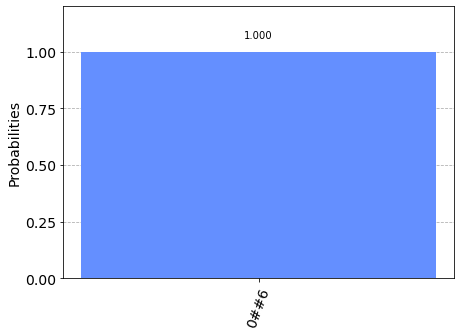

In [8]:
from qiskit_qudits import QuditCircuit
qdc = QuditCircuit([7], 1, 0)
qdc.ls(0, 0, 0, 6)
qdc.measure_all()
print(qdc)

import numpy as np
np.set_printoptions(linewidth=200, precision=2, suppress=True)
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
from qiskit_qudits.visualization import counts_to_quditcounts

simulator = Aer.get_backend('qasm_simulator') #simulation part
job = execute(qdc, simulator, shots=99)
counts = job.result().get_counts()
qd_counts = counts_to_quditcounts(qdc, counts)
plot_histogram(qd_counts)
